## Lab | Cleaning numerical data

##### Import the necessary libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

##### Load the customer_value_analysis.csv into the variable customer_df.

In [2]:
customer_df = pd.read_csv('customer_value_analysis.csv')

##### First look at its main features (head, shape, info).

In [5]:
customer_df.shape
display(customer_df.head())
display(customer_df.info())

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

None

##### Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores).

In [6]:
customer_df.columns = [col.lower().replace(' ', '_') for col in customer_df.columns]
display(customer_df.head())

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


##### Change the type of effective_to_date column to DateTime format.

In [12]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

##### Check NaN values per column.

In [15]:
customer_df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

##### Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.

In [28]:
def separate_numerical_categorical(dataframe):
    numerical_columns = dataframe.select_dtypes(include=['number'])
    categorical_columns = dataframe.select_dtypes(exclude=['number'])

    return numerical_columns, categorical_columns

numerical_columns, categorical_columns = separate_numerical_categorical(customer_df)
display(numerical_columns)
display(categorical_columns)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


##### Drop any ID column.

In [29]:
customer_df = customer_df.drop(columns=['customer'])

##### Get the correlation matrix for the numerical variables. What is the pair of numerical variables that have the highest correlation? It makes sense, why?

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


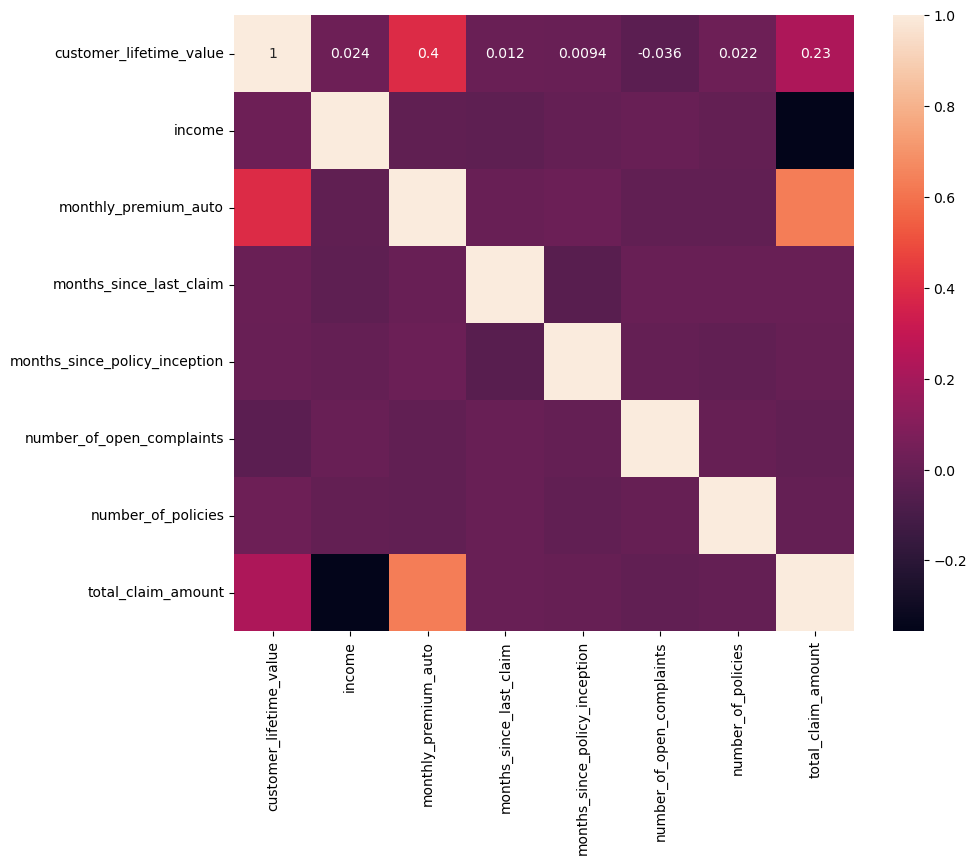

In [35]:
corr_matrix = numerical_columns.corr() 
display(corr_matrix)
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

##### Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.

In [39]:
def categorize_numerical_columns(df, threshold=36):
    continuous_cols = []
    discrete_cols = []

    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            unique_values = df[col].nunique()
            if unique_values > threshold:
                continuous_cols.append(col)
            else:
                discrete_cols.append(col)

    continuous_df = df[continuous_cols]
    discrete_df = df[discrete_cols]

    return continuous_df, discrete_df
continuous_df, discrete_df = categorize_numerical_columns(numerical_columns)
display(continuous_df)
display(discrete_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1
...,...,...,...
9129,18,0,2
9130,14,0,1
9131,9,3,2
9132,34,0,3


##### Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


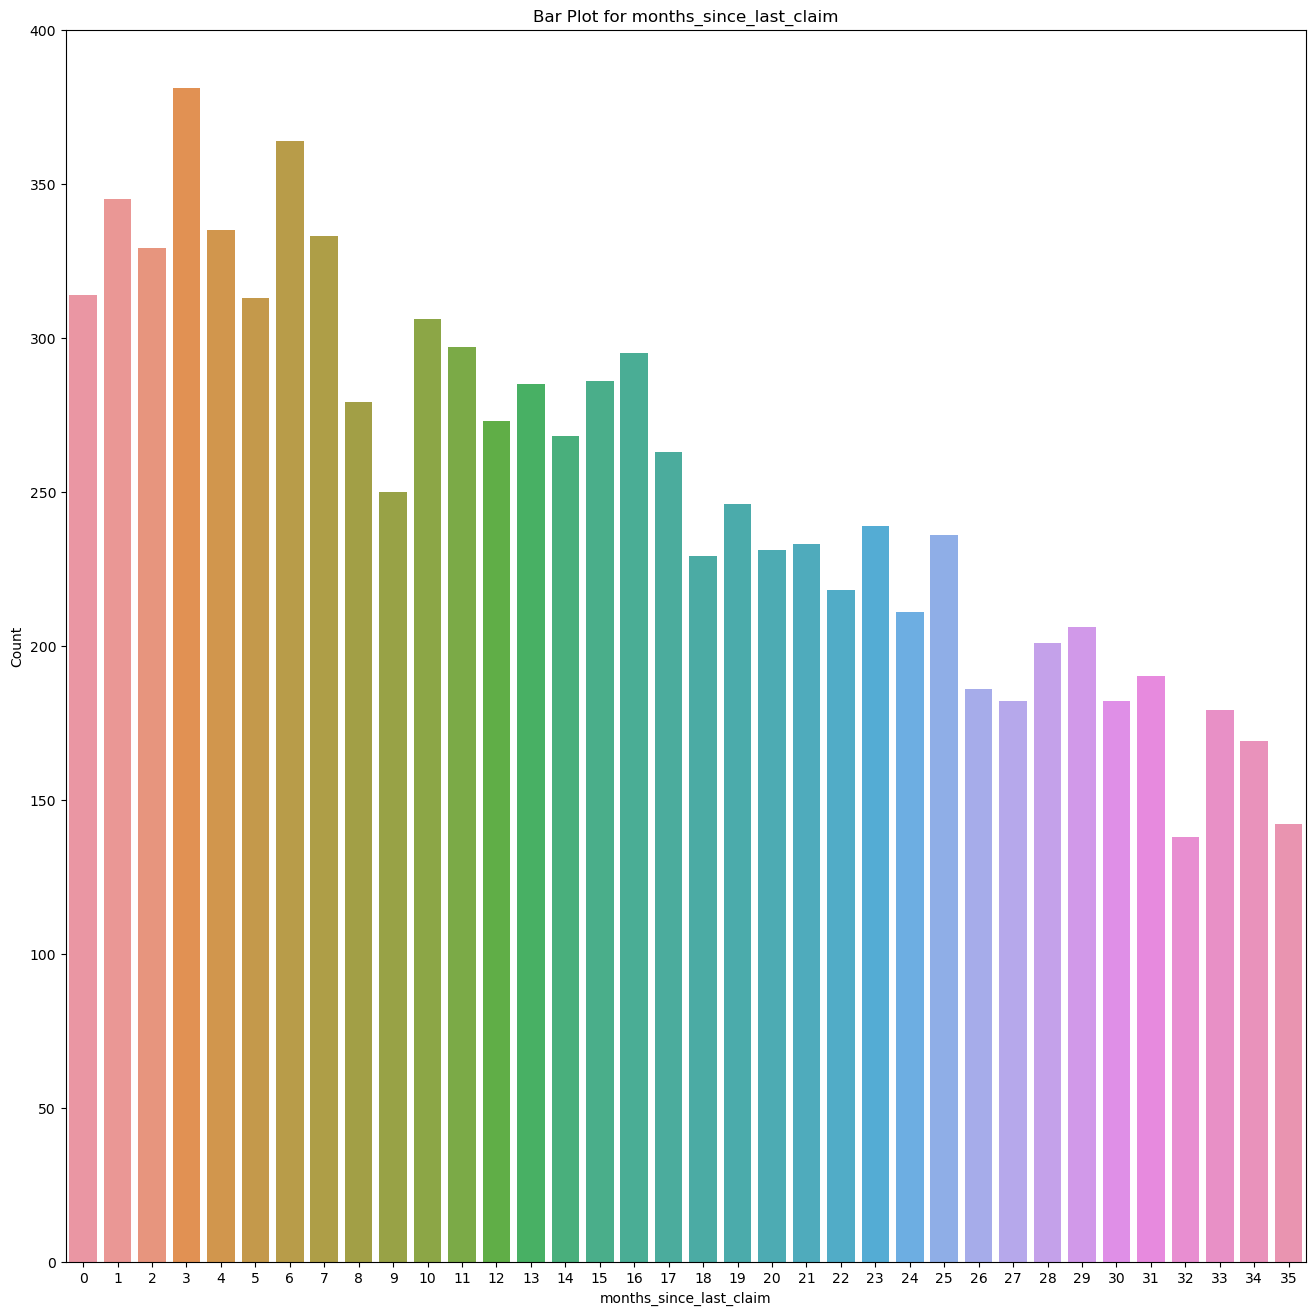

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


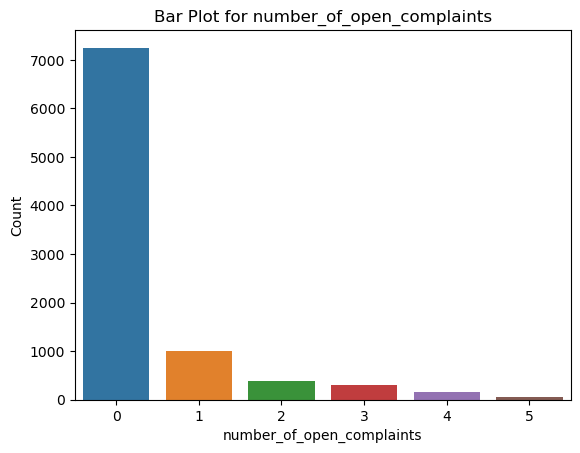

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


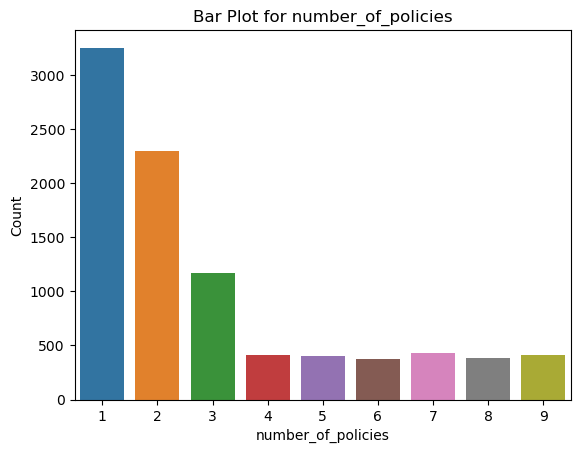

In [48]:
def create_barplot(dataframe):
    plt.figure(figsize=(16, 16))

    for column in dataframe.columns:
        # Create a bar plot for the current column
        sns.countplot(x=column, data=dataframe)
        plt.title(f'Bar Plot for {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()
      
create_barplot(discrete_df)

##### Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


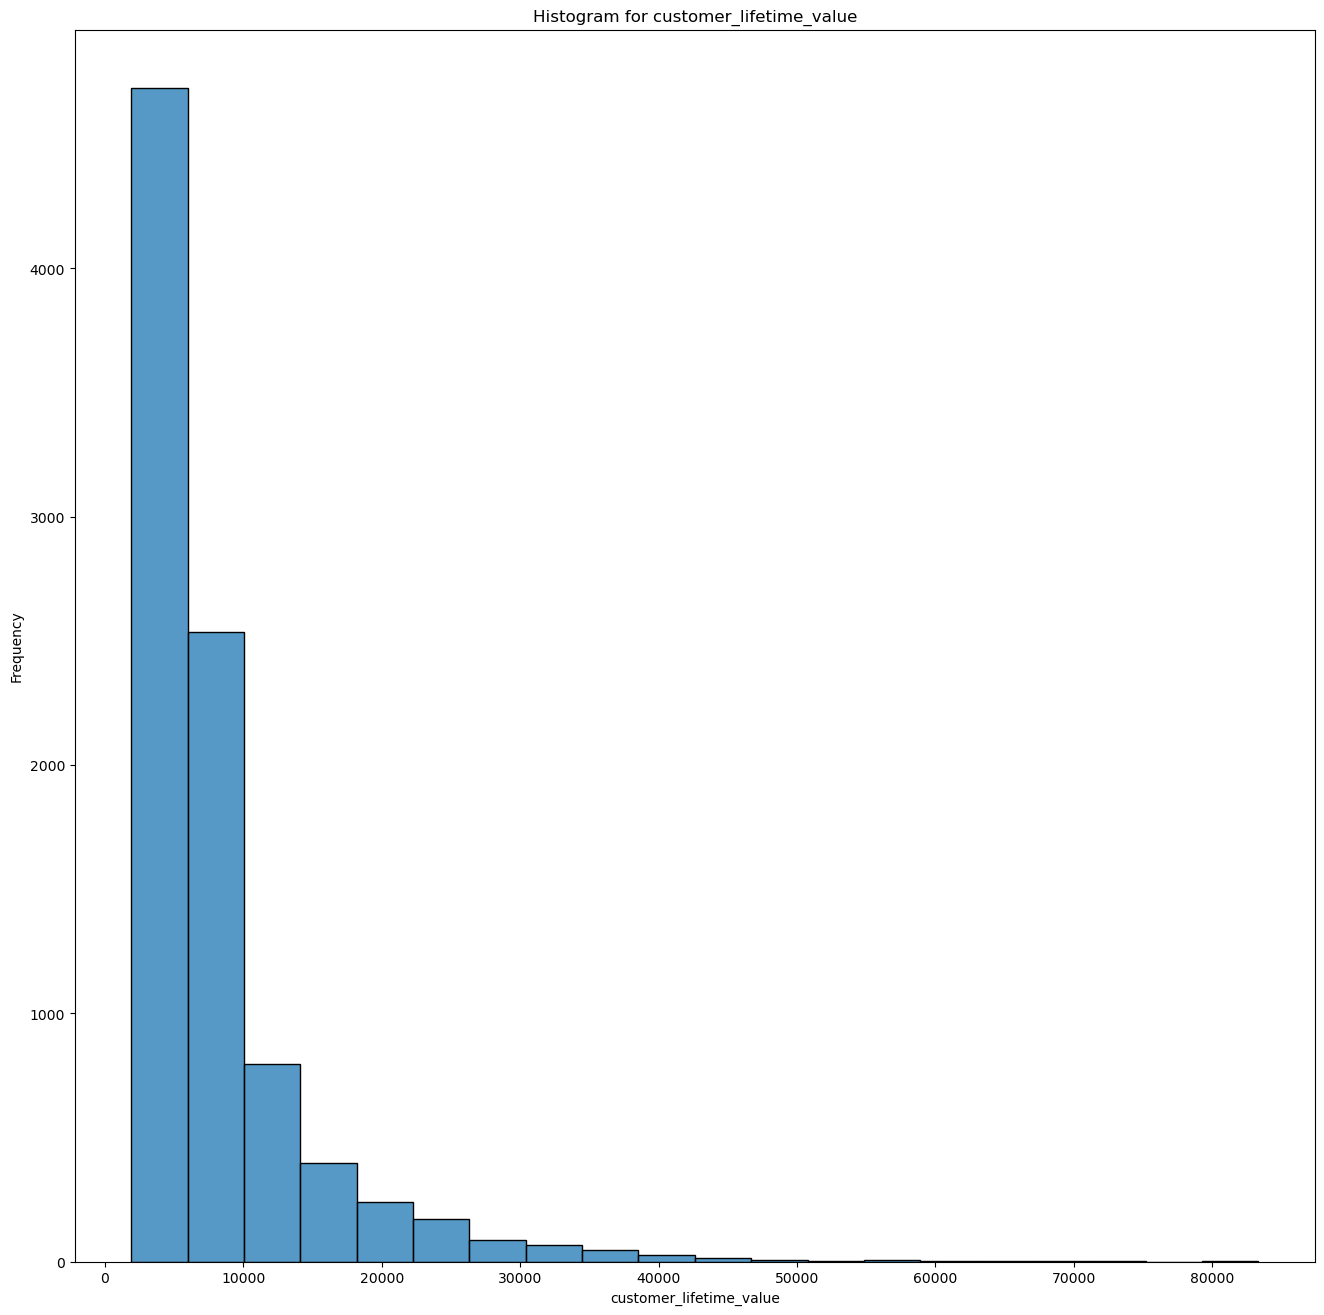

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


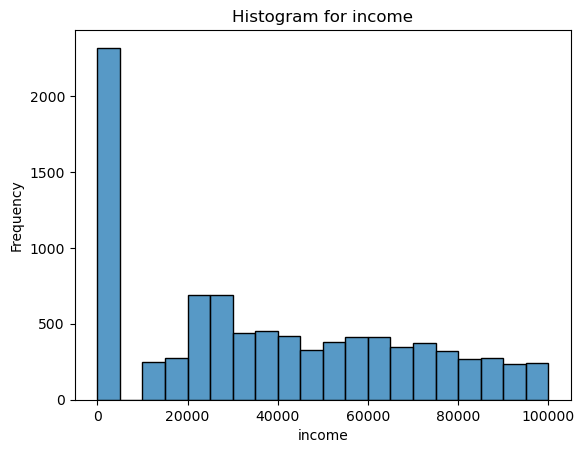

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


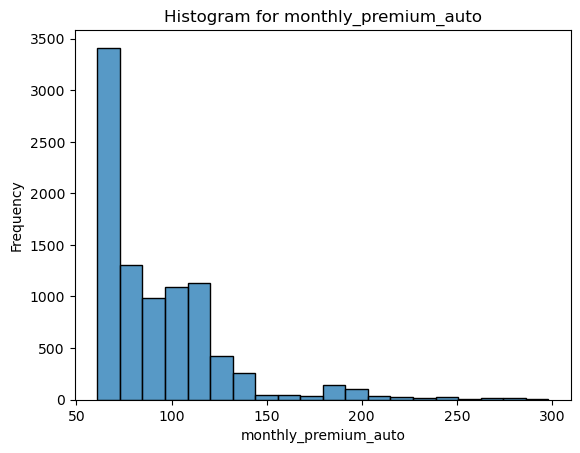

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


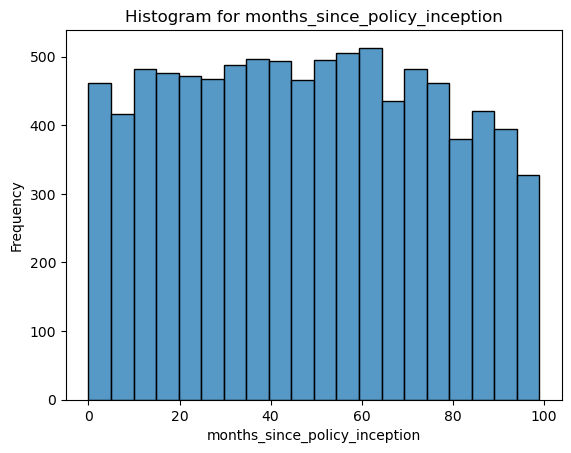

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


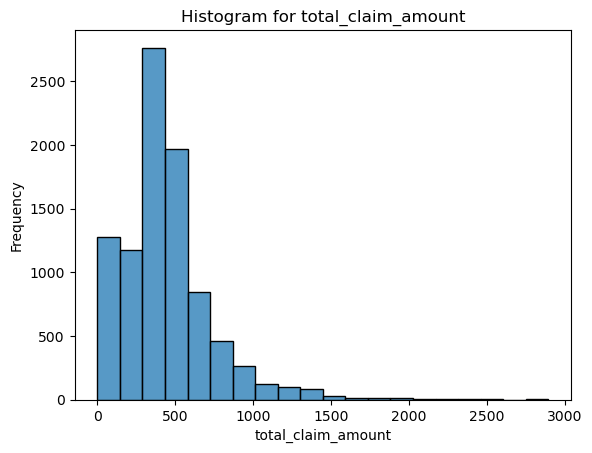

In [49]:
def create_histograms(dataframe):
    plt.figure(figsize=(16, 16))

    for column in dataframe.columns:
        sns.histplot(dataframe[column], bins=20)
        plt.title(f'Histogram for {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

create_histograms(continuous_df)

##### According to the previous histogram plots, do you think that you will have to apply any transformation?

In [55]:
continuous_df.skew()

customer_lifetime_value          3.032280
income                           0.286887
monthly_premium_auto             2.123546
months_since_policy_inception    0.040165
total_claim_amount               1.714966
dtype: float64

In [ ]:
columns_to_transform = ['customer_lifetime_value', 'monthly_premium_auto', 'total_claim_amount']

# Apply logarithmic transformation
for column in columns_to_transform:
    continuous_df[column] = np.log1p(continuous_df[column])

In [ ]:
transformer = StandardScaler()
transformer.fit(X_num)
x_standardized = transformer.transform(X_num)
#print(x_standardized.shape)
pd.DataFrame(x_standardized, columns=X_num.columns).describe().T

C:\Users\vikto\AppData\Local\Temp\ipykernel_19068\2761750731.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continuous_df['CLV_transformed'] = pt.transform(continuous_df[['customer_lifetime_value']])
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


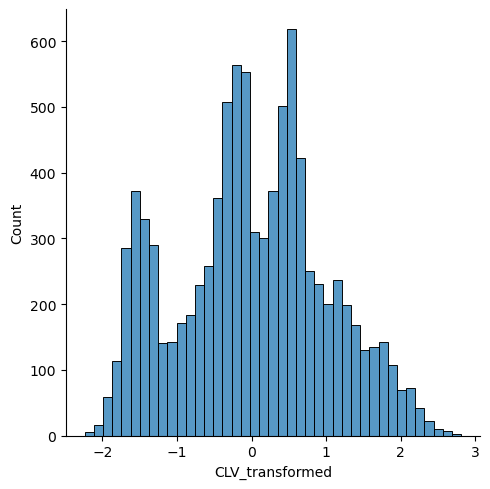

In [57]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer() # Yeo-Johnson. Box-Cox (can only be applied if all the values are positive)
pt.fit(continuous_df[['customer_lifetime_value']])
continuous_df['CLV_transformed'] = pt.transform(continuous_df[['customer_lifetime_value']])
sns.displot(continuous_df['CLV_transformed'])
plt.show()

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


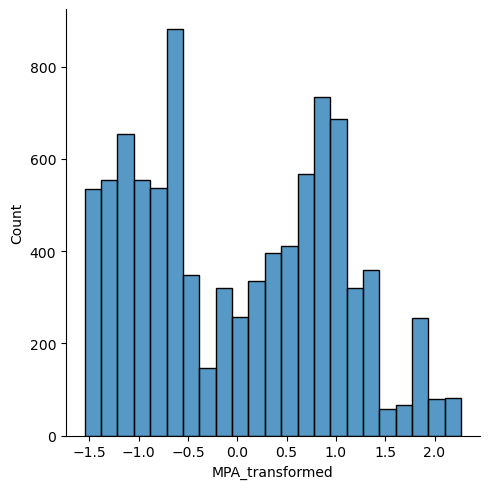

In [72]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer() 
pt.fit(continuous_df[['monthly_premium_auto']])
continuous_df['MPA_transformed'] = pt.transform(continuous_df[['monthly_premium_auto']])
sns.displot(continuous_df['MPA_transformed'])
plt.show()

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


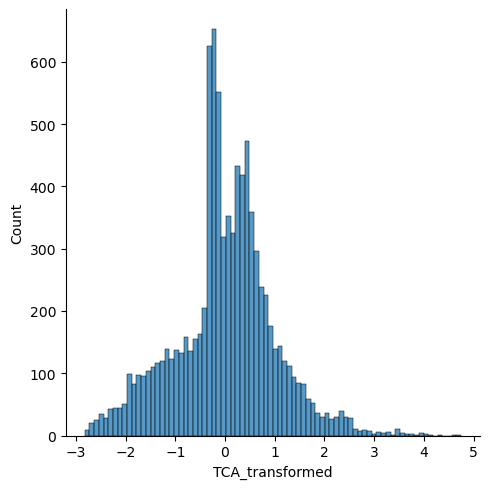

In [73]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer() 
pt.fit(continuous_df[['total_claim_amount']])
continuous_df['TCA_transformed'] = pt.transform(continuous_df[['total_claim_amount']])
sns.displot(continuous_df['TCA_transformed'])
plt.show()

##### Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.

In [74]:
def detect_outliers_zscore(df: pd.DataFrame, column: str, threshold: int=3) ->list:
 
    df2 = continuous_df.copy()
    outliers = []

    df2['abs-z-score'] = np.abs( ( df2[column] - df2[column].mean() ) / df2[column].std(ddof=1) )

    outliers = df2[ df2['abs-z-score'] > threshold ].index.tolist()

    return outliers

In [75]:
outliers_zscore = detect_outliers_zscore(continuous_df, "customer_lifetime_value")
print("Outliers from Z-scores method: ", outliers_zscore)
outliers_zscore = detect_outliers_zscore(continuous_df, "monthly_premium_auto")
print("Outliers from Z-scores method: ", outliers_zscore)
outliers_zscore = detect_outliers_zscore(continuous_df, "total_claim_amount")
print("Outliers from Z-scores method: ", outliers_zscore)

Outliers from Z-scores method:  [50, 51, 79, 125, 232, 266, 303, 315, 373, 375, 385, 404, 407, 408, 512, 541, 626, 681, 820, 832, 836, 856, 914, 1002, 1078, 1120, 1174, 1184, 1233, 1330, 1382, 1392, 1466, 1506, 1521, 1558, 1640, 1657, 1796, 1812, 1824, 1858, 1861, 1974, 2104, 2116, 2136, 2190, 2191, 2294, 2303, 2488, 2504, 2540, 2600, 2652, 2775, 2786, 2908, 3075, 3145, 3162, 3203, 3210, 3217, 3325, 3457, 3465, 3566, 3581, 3595, 3608, 3628, 3634, 3692, 3695, 3760, 3763, 4056, 4074, 4078, 4126, 4128, 4195, 4298, 4369, 4388, 4426, 4443, 4478, 4483, 4584, 4721, 4803, 4811, 4915, 4930, 4944, 4971, 5037, 5059, 5094, 5109, 5196, 5212, 5272, 5279, 5343, 5346, 5403, 5485, 5496, 5554, 5593, 5629, 5647, 5657, 5716, 5765, 5767, 5804, 5824, 5847, 5944, 5987, 6008, 6015, 6102, 6106, 6107, 6158, 6229, 6251, 6252, 6316, 6329, 6461, 6475, 6554, 6569, 6584, 6605, 6606, 6693, 6793, 6796, 6817, 6858, 6861, 6884, 6904, 6977, 6982, 7002, 7102, 7117, 7140, 7172, 7254, 7283, 7291, 7303, 7304, 7316, 7358, 738

C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vikto\anaconda3\envs\base_new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

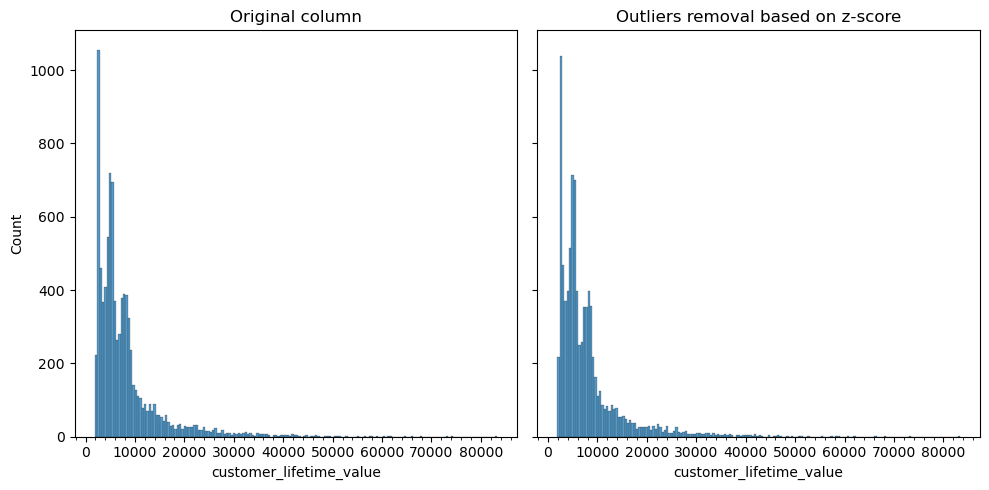

In [76]:
from matplotlib.ticker import AutoMinorLocator

no_outliers_zscore = continuous_df.copy()

no_outliers_zscore.drop(outliers_zscore, axis=0, inplace=True)

fig, ax = plt.subplots(1,2,  sharey=True, sharex=True, figsize=(10,5))
sns.histplot(data=continuous_df, x="customer_lifetime_value", ax = ax[0])
ax[0].set_title("Original column")
ax[0].xaxis.set_minor_locator(AutoMinorLocator(5))
#ax[0].grid()
sns.histplot(data=no_outliers_zscore, x="customer_lifetime_value", ax = ax[1])
ax[1].set_title("Outliers removal based on z-score")
ax[1].xaxis.set_minor_locator(AutoMinorLocator(5))
#ax[1].grid()

plt.tight_layout()
plt.show()

##### 